In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/all.csv')
df.head()

,month,url,count
0,2018-06,http://www.transform-social.org/texte/anarchie/,196
1,2018-06,http://www.transform-social.org/,178
2,2018-06,http://www.transform-social.org/texte/eso/,82
3,2018-06,http://www.transform-social.org/documents/zeic...,21
4,2018-06,http://www.transform-social.org/texte/,16


## Max number of hits for one page in one month

In [3]:
df['count'].max()

8077

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
df = df.sort_values(by=['month', 'count'], ascending=[True, False])
df = df.reset_index(drop=True)
df.head()

,month,url,count
0,2017-12,http://www.transform-social.org/,65
1,2017-12,http://www.transform-social.org/wasistdas/,12
2,2017-12,http://www.transform-social.org/texte/,10
3,2017-12,http://www.transform-social.org/bibliothek/,5
4,2017-12,http://www.transform-social.org/texte/konflikte/,2


## Total hits per Month

In [6]:
sums = df.groupby(by = ['month']).sum()
sums.head(200)

,count
month,
2017-12,106
2018-01,367
2018-02,326
2018-03,414
2018-04,418
...,...
2023-08,8616
2023-09,8062
2023-10,8583


<IPython.core.display.Javascript object>


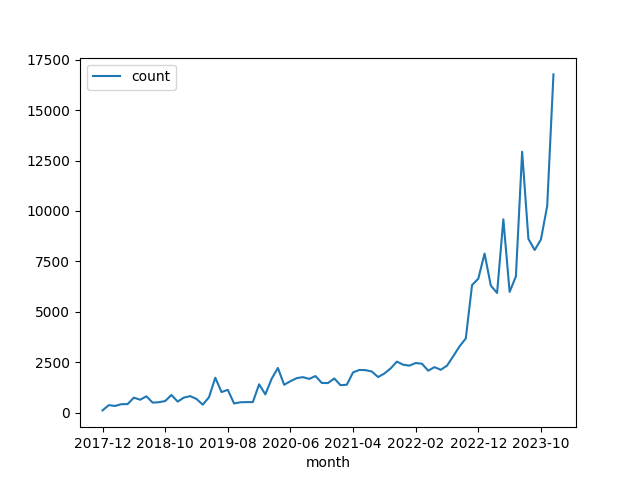

<AxesSubplot:xlabel='month'>

In [7]:
sums.plot()

## Total Hits per Month on the Landing Page

In [8]:
main_url = df[df['url'] == 'http://www.transform-social.org/']
sums = main_url.groupby(by = ['month']).sum()
sums.tail(10)

,count
month,
2023-03,1910
2023-04,4005
2023-05,2480
2023-06,2417
2023-07,5729
2023-08,3848
2023-09,3825
2023-10,3321
2023-11,3194


<IPython.core.display.Javascript object>


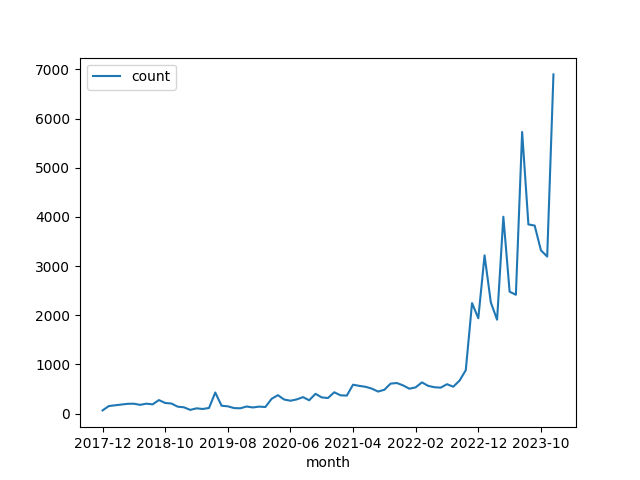

<AxesSubplot:xlabel='month'>

In [11]:
sums.plot()

## Most Popular Pages

In [9]:
grouped = df.groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False])
grouped = grouped.reset_index(drop=False)
grouped.head(25)

,url,count
0,http://www.transform-social.org/,68153
1,http://www.transform-social.org/robots.txt,21174
2,http://www.transform-social.org/wasistdas/,9052
3,http://www.transform-social.org/texte/tools/,7578
4,http://www.transform-social.org/texte/knappheit/,6986
5,http://www.transform-social.org/css/custom.css,5646
6,http://www.transform-social.org/texte/cybersyn/,5197
7,http://www.transform-social.org/texte/eso/,5089
8,http://www.transform-social.org/texte/utopie_c...,4335
9,http://www.transform-social.org/texte/,4045


## Most Popular Pages in the last Months

In [10]:
grouped = df[df['month'] > '2023-10'].groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False])
grouped = grouped.reset_index(drop=False)
grouped.head(25)

,url,count
0,http://www.transform-social.org/,11271
1,http://www.transform-social.org/en/,1981
2,http://www.transform-social.org/texte/selbstli...,1873
3,http://www.transform-social.org/texte/knappheit/,1491
4,http://www.transform-social.org/robots.txt,1463
5,http://www.transform-social.org/documents/mitO...,874
6,http://www.transform-social.org/css/w3.css,729
7,http://www.transform-social.org/css/custom.css,712
8,http://www.transform-social.org/css/custom_pri...,684
9,http://www.transform-social.org/en/texts/love_...,633


## Top all-time Texte

<IPython.core.display.Javascript object>


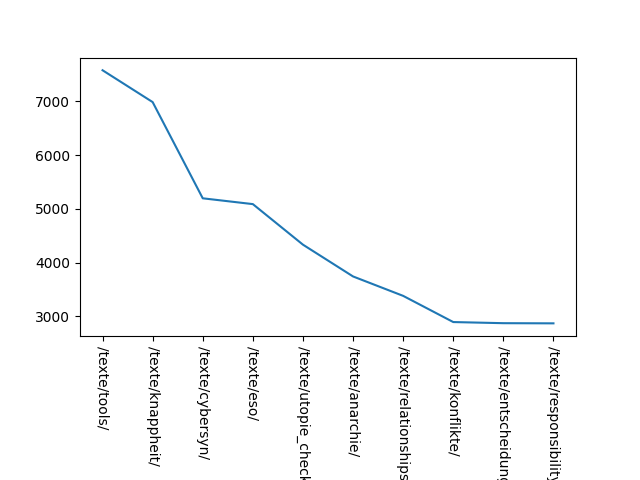

In [11]:
%matplotlib notebook 
de_base = 'http://www.transform-social.org/texte/'
grouped = df[df['url'].str.startswith(de_base) & ~df['url'].str.endswith(de_base)].groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False]).head(10)
grouped = grouped.reset_index(drop=False)
x = grouped['url'].index.values
top_de_urls = grouped['url'].values[0:5]
y = grouped['count'].values
xticks = map(lambda x: x.replace('http://www.transform-social.org', ''), grouped['url'].values)
plt.figure(11)
plt.xticks(x, xticks, rotation=270)
plt.subplots_adjust(bottom=0.3)
plt.plot(x,y)
plt.show()

## Top all-time en/texts

<IPython.core.display.Javascript object>


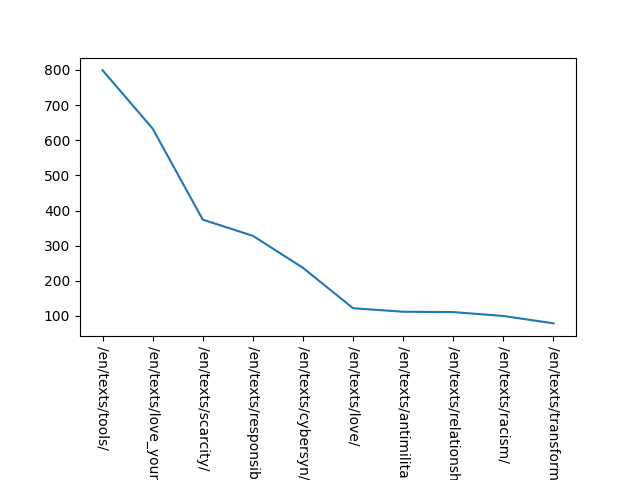

In [12]:
%matplotlib notebook 
en_base = 'http://www.transform-social.org/en/texts/'
grouped = df[df['url'].str.startswith(en_base) & ~df['url'].str.endswith(en_base)].groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False]).head(10)
grouped = grouped.reset_index(drop=False)
x = grouped['url'].index.values
top_en_urls = grouped['url'].values[0:5]
y = grouped['count'].values
xticks = map(lambda x: x.replace('http://www.transform-social.org', ''), grouped['url'].values)
plt.figure(11)
plt.xticks(x, xticks, rotation=270)
plt.subplots_adjust(bottom=0.3)
plt.plot(x,y)
plt.show()

## de vs en texts over time

<IPython.core.display.Javascript object>


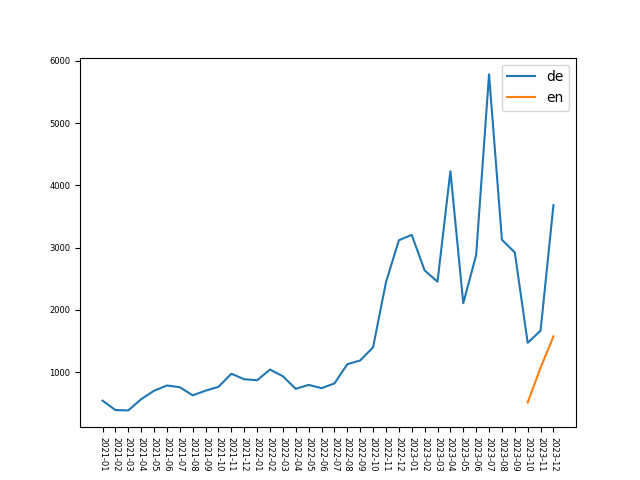

In [13]:
%matplotlib notebook 
de = df[(df['month'] > '2020-12') & df['url'].str.startswith(de_base)].groupby(by=['month']).sum()
en = df[(df['month'] > '2020-12') & df['url'].str.startswith(en_base)].groupby(by=['month']).sum()

plt.figure(21)
plt.plot(de)
plt.plot(en)
plt.legend(["de", "en"])
plt.xticks(rotation=270)
plt.tick_params(labelsize=6)

plt.show()

## Top Texts over Time

<IPython.core.display.Javascript object>


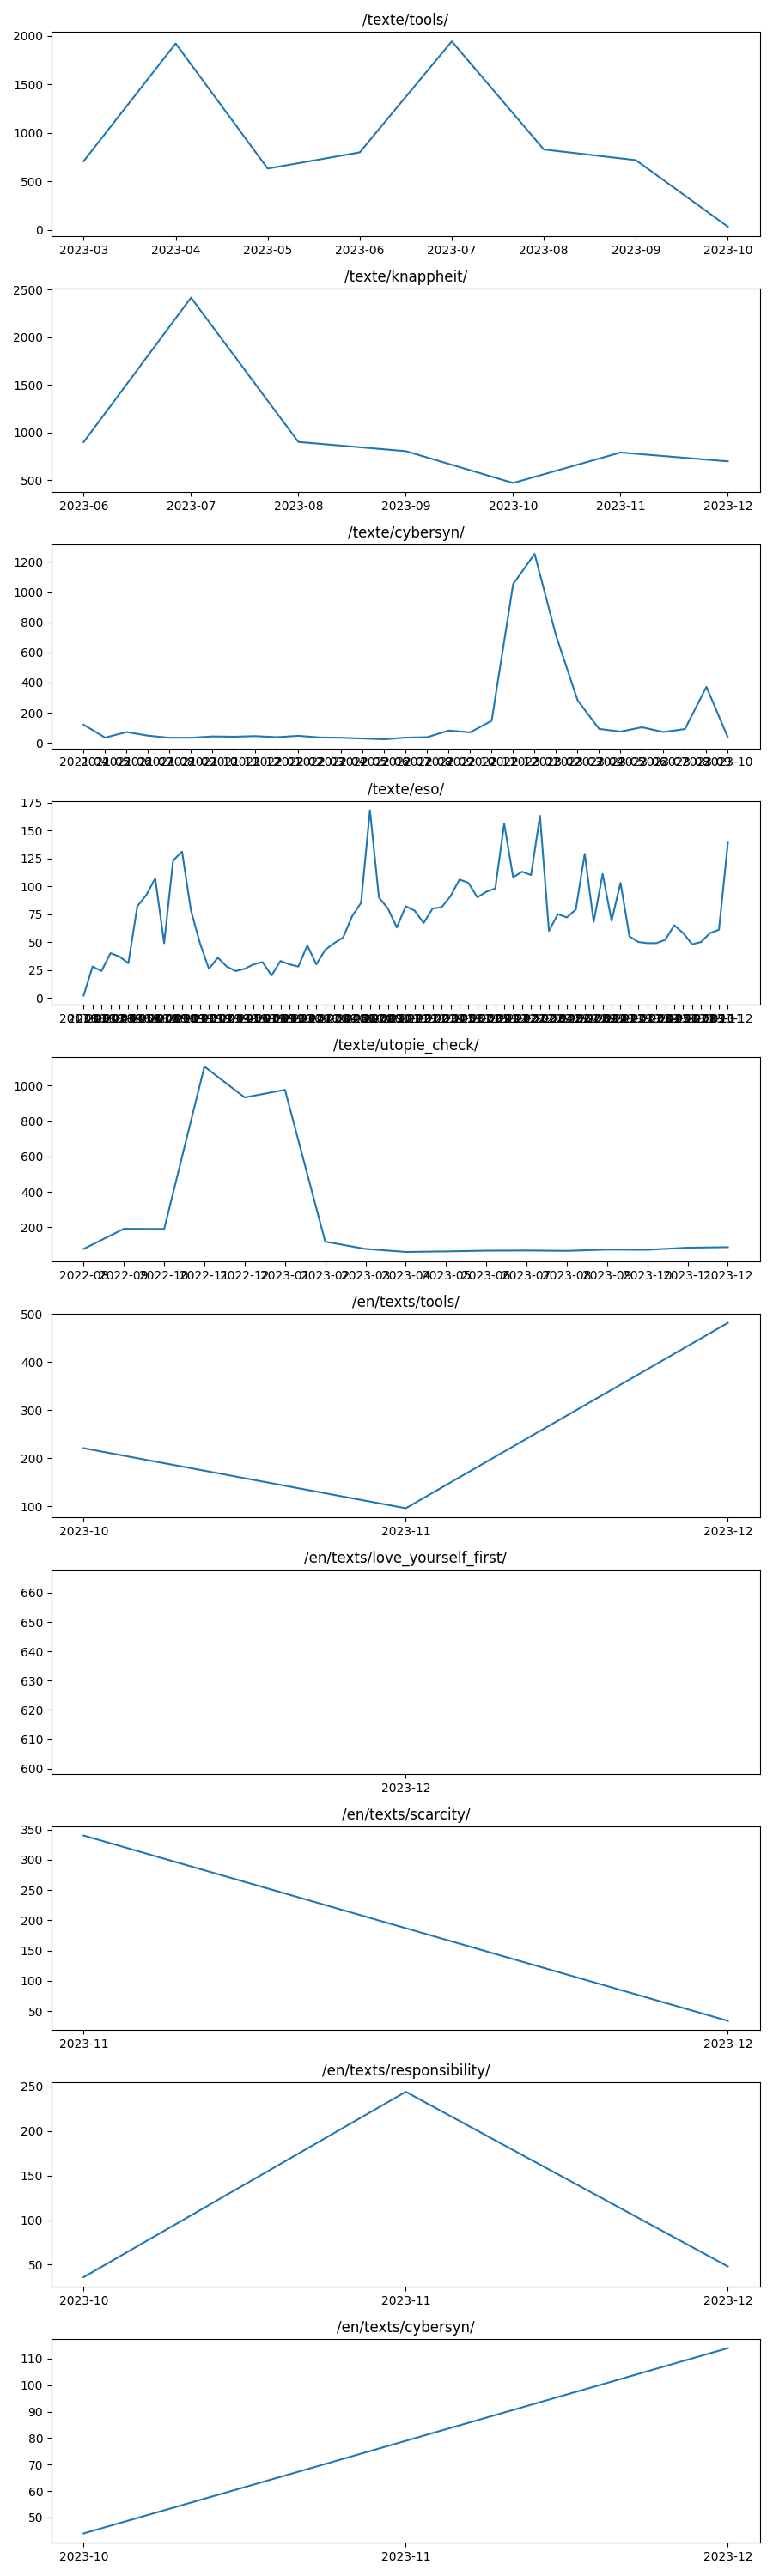

In [14]:
# reset defaults
%matplotlib notebook 


fig, axs = plt.subplots(10, figsize=(9, 30))

for index, url in enumerate(top_de_urls):
    subdata = df[df['url'].str.endswith(url)].sort_values(by=['month'])
    axs[index].plot(subdata['month'].values, subdata['count'].values)
    axs[index].set_title(url.replace('http://www.transform-social.org', ''))
 

for index, url in enumerate(top_en_urls):
    subdata = df[df['url'].str.endswith(url)].sort_values(by=['month'])
    axs[index+len(top_de_urls)].plot(subdata['month'].values, subdata['count'].values)
    axs[index+len(top_de_urls)].set_title(url.replace('http://www.transform-social.org', ''))
    
 
fig.tight_layout()
                                                